# Introduction

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.autograd as autograd
from torch import nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# A Basic Equation
The majority of this lab will focus on the steady, 1D advection-diffusion equation
\begin{align}
  &a\dfrac{\partial u}{\partial x} - \nu \dfrac{\partial^{2}u}{\partial x^{2}} = 0, \quad 0<x<1 \\
  & \quad u\left(0\right)=b_{1}, u\left(1\right) = b_{2}
\end{align}
where
* $u(x)$ is the quantity we'd like to find
* $x$ is the domain
* $a>0$ is the constant advection coefficient
* $\nu>0$ is the constant diffusion coefficient
* $b_{1}$ is the left boundary value and $b_{2}$ is the right boundary value

## Task 1: Analytical Solution
Verify that 
\begin{align}
  u\left(x\right) = \dfrac{1}{e^{\kappa} - 1}\left[b_{1}\left(e^{\kappa} - e^{\kappa x}\right) - b_{2}\left(1-e^{\kappa x}\right)\right], \quad \kappa = \dfrac{a}{\nu}
\end{align}
satisfies the differential equation and boundary conditions.

## Task 2: Visualize the Analytical Solution
Plot the analytical solution for three different values of $\kappa$ using the boundary conditions $b_{1}=1$ and $b_{2}=0$. Make sure to label the axes clearly and provide a legend on the figure. Use the function signature provided for the analytical solution. You will need to fill in the details.

In [2]:
def adv_diff_analytical(a, nu, bc1, bc2, x):
    '''
    inputs
    ------
    a: advection velocity (positive number)
    nu: diffusion coefficient (postive number)
    bc1: left boundary condition
    bc2: right boundary condition
    x: domain (numpy array)

    outputs
    -------
    u: analytical solution (a numpy array)
    '''
    kappa = 
    u = 
    return u

In [4]:
b1 = 1.0
b2 = 0.0
x = np.linspace(0.0, 1.0, 512)

u1 = 
u2 = 
u3 = 

Text(0, 0.5, '$u$')

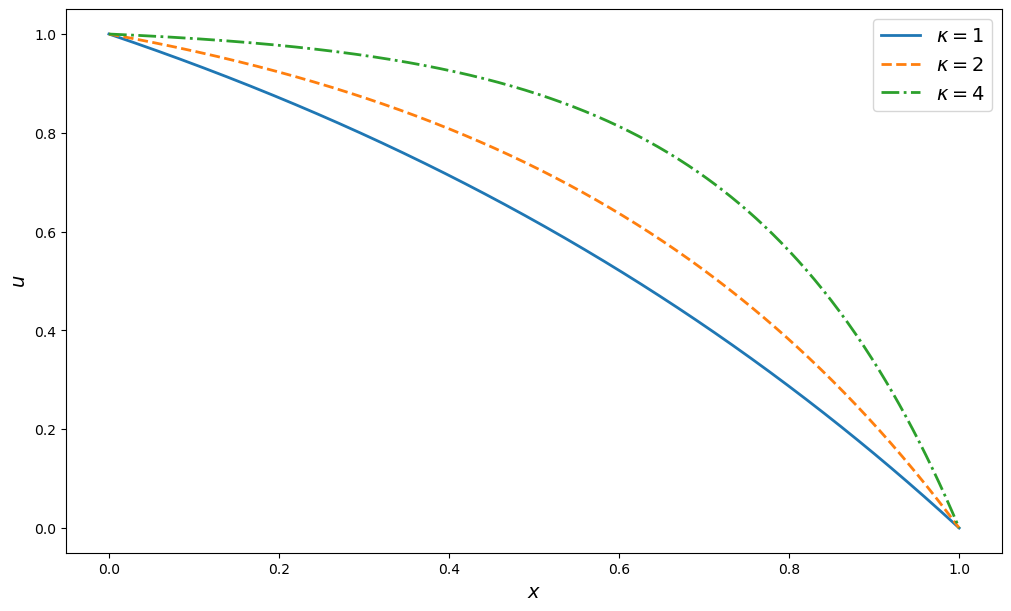

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,6), constrained_layout=True)
ax.plot(x, u1, ls='-', lw=2, label=r'$\kappa=1$')
ax.plot(x, u2, ls='--', lw=2, label=r'$\kappa=2$')
ax.plot(x, u3, ls='-.', lw=2, label=r'$\kappa=4$')

ax.legend(fontsize=14)
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$u$', fontsize=14)

# A "Neural Network" by Hand
In this section, you will create two neural networks by hand to get the feeling of things.

## Task 3: A Single Neuron
Write down the formula for the output of a neural network that has the following properties:
* The input is $x$
* The input goes through a neuron with weight $w$, bias $b$ and activation function $\phi$. Denote this output by $h$.
* The final output is a linear function with weight $w_{o}$ and bias $b_{o}$

### Solution

### Task 4: A Simple `Python` function
Write a `Python` class that returns the output of a neural network with a single neuron. The class scaffolding is provided below to get you started.

In [7]:
# Class definition
class SingleNeuronNN():
    def __init__(self, actv, x):
        '''Constructor
        inputs:
        actv: the activation function
        x: input (numpy array)
        '''
        self.phi = actv
        self.input = x
    
    def nn_layer(self, w, b):
        '''Single neuron layer
        inputs:
        w: scalar weight parameter
        b: scalar bias parameter
        output:
        activated neuron
        '''
        h = 
        return h

    def output_layer(self, h, wo, bo):
        '''Output layer
        inputs:
        wo: output weight
        bo: output bias
        output:
        linear activation of layer
        '''
        out = 
        return out

In [8]:
# Use the basic NN
x_in = np.linspace(-1, 1, 100) # Define input (use 100 points)
# Instantiate the NN using any activation function
baby_nn = SingleNeuronNN(np.tanh, x_in)
# Get the output of the first layer
h = baby_nn.nn_layer(1.0, 0.5)
# Get the output of the NN
uhat = baby_nn.output_layer(h, -1.0, 0.5)

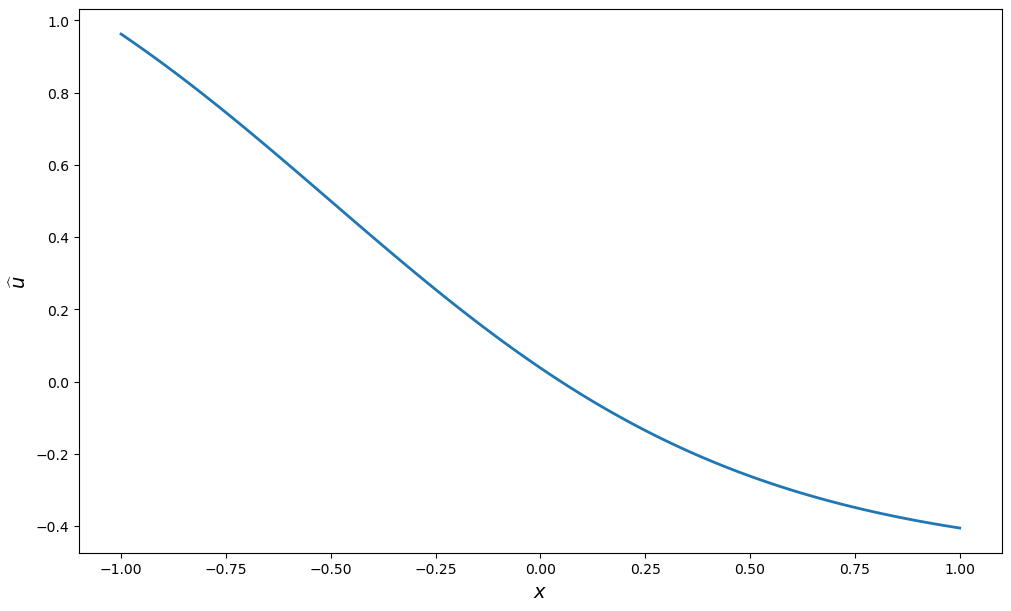

In [9]:
# Plot the solution
fig, ax = plt.subplots(1,1, figsize=(10,6), constrained_layout=True)
ax.plot(x_in, uhat, lw=2)
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$\widehat{u}$', fontsize=14);

### Task 5: Two Neurons
Repeat Tasks 3 and 4, but this time instead of just a single neuron, create a network with two neurons.

In [10]:
# Class definition
class TwoNeuronNN():
    def __init__(self, actv, x):
        '''Constructor
        inputs:
        actv: the activation function
        x: input (numpy array)
        '''
        self.phi = actv
        self.input = x
    
    def nn_layer(self, w, b):
        '''Single neuron layer
        inputs:
        w: numpy array of weight parameters (size=num_neurons in layer)
        b: numpy array of bias parameters (size=num_neurons in layer)
        output:
        activated neurons (size=num_neurons in layer)
        '''
        # The below code is provided to you to get started
        h = np.tensordot(w, self.input, axes=0).T # This shape should be num_input_points X num_neurons
        
        # Next add the bias
        # fill in here
        
        # Finally apply the activation function 
        # fill in here
        return h
    
    def output_layer(self, h, wo, bo):
        '''Output layer
        inputs:
        h: numpy array of the output of the last layer (size=num_input_points X num_neurons)
        wo: numpy array of output weights (size=num_neurons in final layer)
        bo: numpy array of output bias (size=scalar number)
        output:
        linear activation of layer (size=num_input_points)
        '''
        return np.tensordot(h, wo, axes=1) + bo

In [11]:
x_in = np.linspace(-1, 1, 100)
w = np.array([1.0, 2.0])
b = np.array([-0.5, 0.5])

wo = np.array([0.25, 1.0])
bo = -0.3

In [12]:
# Instantiate the NN using any activation function
baby_nn = TwoNeuronNN(np.tanh, x_in)
# Get the output of the first layer
h = baby_nn.nn_layer(w, b)
# Get the output of the NN
uhat = baby_nn.output_layer(h, wo, bo)

### Task 6: Visualize the Solution
Plot the output of the 2-neuron network. The result shouldn't look like anything really useful yet.

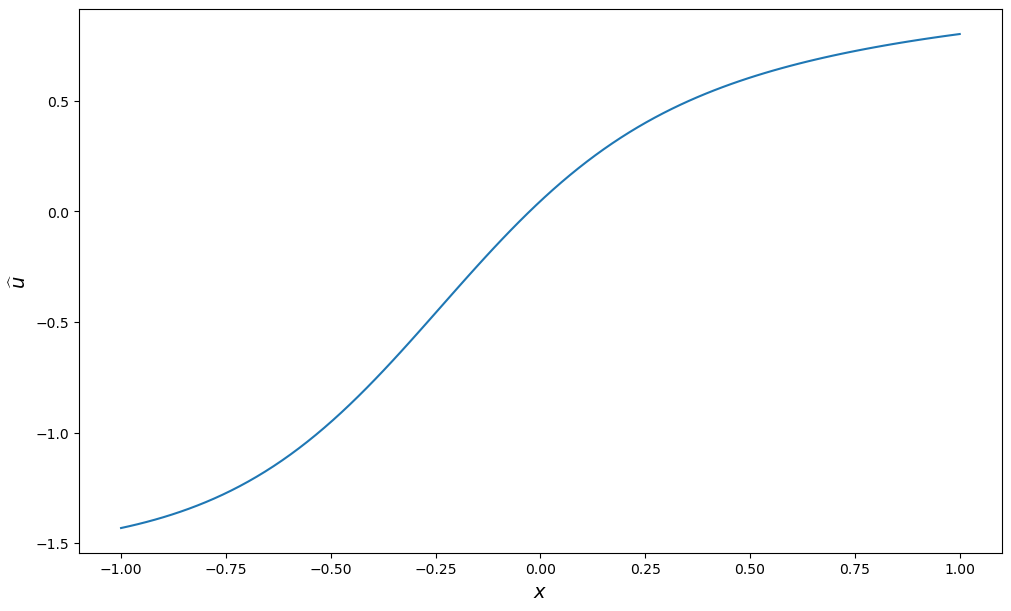

In [13]:
# Plot the solution
fig, ax = plt.subplots(1,1, figsize=(10,6), constrained_layout=True)
ax.plot(x_in, uhat)
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$\widehat{u}$', fontsize=14);

### Task 7: Playing with Weights and Biases
Start tweaking the weights and biases by hand and see how the result changes. It would be really awful to have to tweak these by hand until we got a solution that looks like the analytical solution. It would be utterly impossible to do this for a realistic network.


## Calculating Losses by Hand
We will use the basic mean-squared error (MSE) loss function 
\begin{align}
  L = \dfrac{1}{N}\sum_{n=1}^{N}{\left(a\dfrac{\partial \widehat{u}}{\partial x}\left(x_{n}\right) - \nu \dfrac{\partial^{2}\widehat{u}}{\partial x^{2}}\left(x_{n}\right)\right)^{2}}
\end{align}
where $\widehat{u}\left(x\right)$ is the neural network solution and $\dfrac{\partial \widehat{u}}{\partial x}\left(x_{n}\right)$ and $\dfrac{\partial^{2} \widehat{u}}{\partial x^{2}}\left(x_{n}\right)$ are the first and second derivatives of the neural network solution, respectively, evaluated at the point $x_{n}$.

### Task 8: The Loss Function
Write down the loss using the basic 1-neuron model. You may leave the loss in terms of an activation function $\phi$ and its derivatives.

The necessary derivatives of the NN solution are 
\begin{align}
  \dfrac{\partial \widehat{u}}{\partial x} &= w_{o}w\phi^{\prime}\left(wx+b\right) \\
  \dfrac{\partial^{2} \widehat{u}}{\partial x^{2}} &= w_{o}w^{2}\phi^{\prime\prime}\left(wx+b\right)
\end{align}

### Task 9: Optimizing the loss function
Using the basic 1-neuron model again, calculate the derivative of the loss with respect to the neuron weight. Note that in a real model, this derivative would need to be done with respect to all the model parameters. No need to code this up.

## Calculating Losses with `pytorch`
The last part should have felt somewhat tedious. It is pretty far down in the weeds. In this part, we will calculate the loss using `Pytorch`'s automatic differentiation capabilities.

# Solving a Differential Equation with a Neural Network
Give them the skeleton code to fill in for solving a differential equation with a NN. Parts to include for them are:
* NN model
* Optimization loop
* Loss calculation

In [16]:
# Define NN model in class
class basic_mlp(nn.Module):
    def __init__(self, input_dim, out_dim, width=10, depth=3, actv=nn.Tanh):
        super(basic_mlp, self).__init__()
        
        layers = []

        # input layer
        layers.append(nn.Linear(input_dim, width))
        layers.append(actv())

        # hidden layers
        for _ in range(depth):
            layers.append(nn.Linear(width, width))
            #layers.append(nn.Dropout(p=0.5))
            layers.append(actv())
        
        # output lyaer
        layers.append(nn.Linear(width, out_dim))

        self.mlp = nn.Sequential(*layers)
    
    def forward(self, x):
        y = self.mlp(x)
        return y

In [26]:
batch_size = 16
learning_rate = 1.0e-03
num_epochs = 1000

device = torch.device('cpu')
# if torch.cuda.is_available():
#     print("Running on CUDA GPU.")
#     device = torch.device('cuda')

# Create input points
#x = np.random.uniform(size=500) # low=0.0, high=1.0 to get [0.0, 1.0)
x = torch.rand(512,1)
x, _ = torch.sort(x, dim=0)
x_train, x_val = train_test_split(x, test_size=0.25, random_state=42)
# print(x_train.size(), x_val.size())

# Need to package into a dataloader
train_loader = DataLoader(x_train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(x_val, batch_size=batch_size, shuffle=True)

train_batches = len(train_loader)
val_batches = len(val_loader)

# Create the model
model = basic_mlp(1, 1, width=8, depth=3)
model = model.to(device)
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)
L_train = np.zeros(num_epochs)
L_val = np.zeros(num_epochs)

# PDE parameters
a = 1.0
nu = 0.1

# Boundary Condition params
x_left = 0.0
x_right = 1.0
u_left = 1.0
u_right = 0.0
lmbda = 1.0 # boundary loss weighting

# Training loop
for epoch in range(num_epochs):
    print("epoch: {}".format(epoch))

    model.train()
    
    L = 0.0
    
    for bdx, x_in in enumerate(train_loader):

        # two extra points for the left and right boundaries
        x_in = torch.cat((x_in, x_right*torch.ones(1,1)), dim=0)
        x_in = torch.cat((x_left*torch.ones(1,1), x_in), dim=0)

        x_in.requires_grad_() # Need to check this

        uhat = model(x_in)

#         u_NN = model(x_in)
#         uhat = x_in * u_right + (1.0 - x_in) * u_left + x_in * (1.0 - x_in) * u_NN

        d_uhat_dx = autograd.grad(uhat, x_in, grad_outputs=torch.ones_like(uhat), create_graph=True, allow_unused=True)[0]
        d_uhat_dx.requires_grad_()

        d2_uhat_dx2 = autograd.grad(d_uhat_dx, x_in, grad_outputs=torch.ones_like(d_uhat_dx), create_graph=True, allow_unused=True)[0]
        d2_uhat_dx2.requires_grad_() # Need to check this

        pde_res = a * d_uhat_dx[1:-1] - nu * d2_uhat_dx2[1:-1] # ignore boundary points

        zeros = torch.zeros(len(pde_res), 1)

        loss = criterion(pde_res, zeros) + lmbda * ((uhat[0] - u_left)**2.0  + (uhat[-1] - u_right)**2.0) # Do this more efficiently

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        L += loss.item()

    L_train[epoch] = L / train_batches

# After training is complete, save the model and loss

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
epoch: 50
epoch: 51
epoch: 52
epoch: 53
epoch: 54
epoch: 55
epoch: 56
epoch: 57
epoch: 58
epoch: 59
epoch: 60
epoch: 61
epoch: 62
epoch: 63
epoch: 64
epoch: 65
epoch: 66
epoch: 67
epoch: 68
epoch: 69
epoch: 70
epoch: 71
epoch: 72
epoch: 73
epoch: 74
epoch: 75
epoch: 76
epoch: 77
epoch: 78
epoch: 79
epoch: 80
epoch: 81
epoch: 82
epoch: 83
epoch: 84
epoch: 85
epoch: 86
epoch: 87
epoch: 88
epoch: 89
epoch: 90
epoch: 91
epoch: 92
epoch: 93
epoch: 94
epoch: 95
epoch: 96
epoch: 97
epoch: 98
epoch: 99
epoch: 100

epoch: 757
epoch: 758
epoch: 759
epoch: 760
epoch: 761
epoch: 762
epoch: 763
epoch: 764
epoch: 765
epoch: 766
epoch: 767
epoch: 768
epoch: 769
epoch: 770
epoch: 771
epoch: 772
epoch: 773
epoch: 774
epoch: 775
epoch: 776
epoch: 777
epoch: 778
epoch: 779
epoch: 780
epoch: 781
epoch: 782
epoch: 783
epoch: 784
epoch: 785
epoch: 786
epoch: 787
epoch: 788
epoch: 789
epoch: 790
epoch: 791
epoch: 792
epoch: 793
epoch: 794
epoch: 795
epoch: 796
epoch: 797
epoch: 798
epoch: 799
epoch: 800
epoch: 801
epoch: 802
epoch: 803
epoch: 804
epoch: 805
epoch: 806
epoch: 807
epoch: 808
epoch: 809
epoch: 810
epoch: 811
epoch: 812
epoch: 813
epoch: 814
epoch: 815
epoch: 816
epoch: 817
epoch: 818
epoch: 819
epoch: 820
epoch: 821
epoch: 822
epoch: 823
epoch: 824
epoch: 825
epoch: 826
epoch: 827
epoch: 828
epoch: 829
epoch: 830
epoch: 831
epoch: 832
epoch: 833
epoch: 834
epoch: 835
epoch: 836
epoch: 837
epoch: 838
epoch: 839
epoch: 840
epoch: 841
epoch: 842
epoch: 843
epoch: 844
epoch: 845
epoch: 846
epoch: 847

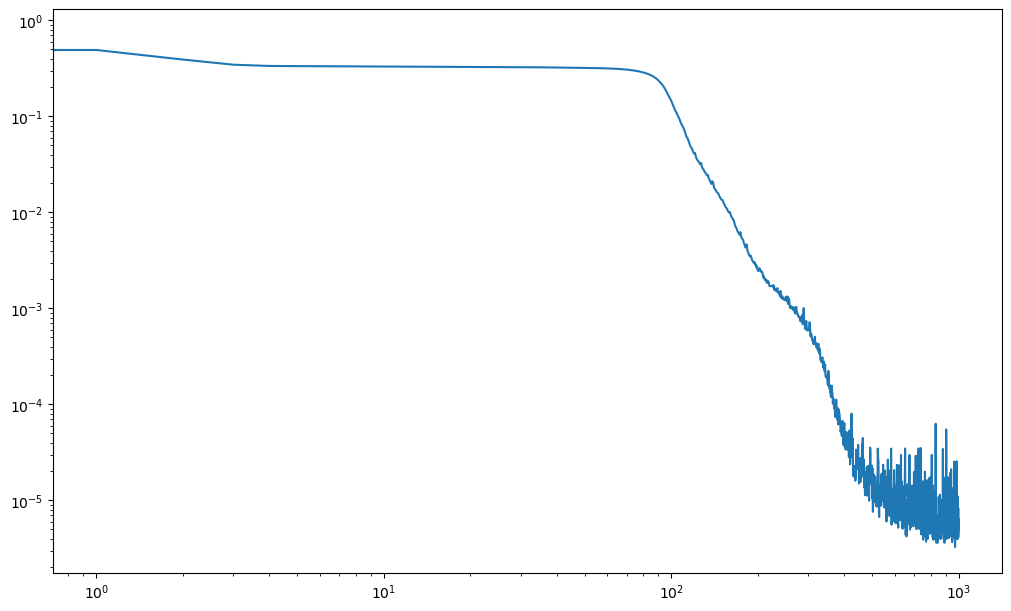

In [27]:
# Plot loss
fig, ax = plt.subplots(1,1, figsize=(10,6), constrained_layout=True)
ax.plot(L_train)
ax.set_xscale('log')
ax.set_yscale('log')

In [28]:
x = torch.rand(512,1)
x, _ = torch.sort(x, dim=0)
x[0] = 0.0
x[-1] = 1.0
uhat = model(x)

In [29]:
x = x.numpy(force=True)
uhat = uhat.numpy(force=True)

In [30]:
b1 = 1.0
b2 = 0.0
x_ana = np.linspace(0.0, 1.0, 512)

a = 1.0
nu = 0.1
u_ana = adv_diff_analytical(a, nu, b1, b2, x_ana)

Text(0, 0.5, '$u$')

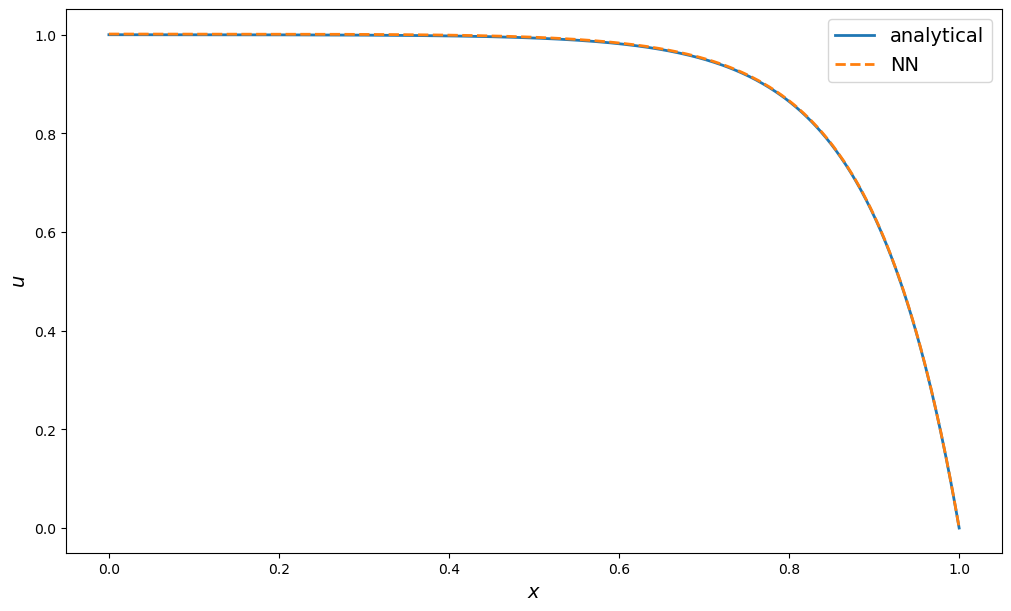

In [31]:
fig, ax = plt.subplots(1,1, figsize=(10,6), constrained_layout=True)
ax.plot(x_ana, u_ana, ls='-', lw=2, label=r'analytical')
ax.plot(x, uhat, ls='--', lw=2, label=r'NN')
ax.legend(fontsize=14)
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$u$', fontsize=14)

# Analyze Results

# Further Tasks
* Change boundary conditions
* Change boundary weighting
* 2D problems